In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pstat197/module-0-class-survey-data-table2/refs/heads/main/data/background-clean.csv')
df.head()

,response_id,prog.prof,prog.comf,math.prof,math.comf,stat.prof,stat.comf,updv.num,dom,do_you_have_any_preference_regarding_working_on_an_industry_project_or_a_research_lab_project,...,LING104,LING110,LING111,CS130,CS165,ECON145,PSTAT127,PSTAT134,CS5,rsrch
0,1,adv,5,int,4,adv,5,9+,Yes,No preference,...,1,1,1,0,0,0,0,0,0,True
1,2,adv,5,int,4,adv,4,6-8,No,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
2,3,adv,4,int,4,adv,4,9+,No,I'm more interested in an industry project,...,0,0,0,1,1,0,0,0,0,False
3,4,adv,4,int,3,adv,4,9+,No,I'm more interested in an industry project,...,0,0,0,1,1,0,0,0,0,False
4,6,int,3,int,3,int,3,6-8,Yes,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True


In [3]:
course_columns = [col for col in df.columns if col.startswith(('CS', 'PSTAT', 'ECON', 'LING'))]
target_column = 'prog.comf'

In [4]:
X = df[course_columns]
y = df[target_column]

In [5]:
# Convert quanlitative categories into numerical values like 0 and 1
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [12]:
y_encoded

array([3, 3, 2, 2, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 3, 2, 3, 1,
       1, 1, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1,
       3, 2, 1, 3, 2, 1, 3], dtype=int64)

In [6]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y_encoded)

RandomForestClassifier(random_state=42)

In [7]:
# Calculate the importance score of each course
importances = model.feature_importances_

course_ranking = pd.DataFrame({
    'Course': course_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [8]:
course_ranking

,Course,Importance
9,CS16,0.133585
6,PSTAT160,0.108485
3,PSTAT122,0.096331
0,PSTAT100,0.085564
5,PSTAT131,0.085406
8,CS9,0.082447
7,PSTAT174,0.079963
1,PSTAT115,0.054646
17,PSTAT134,0.050755
4,PSTAT126,0.047583


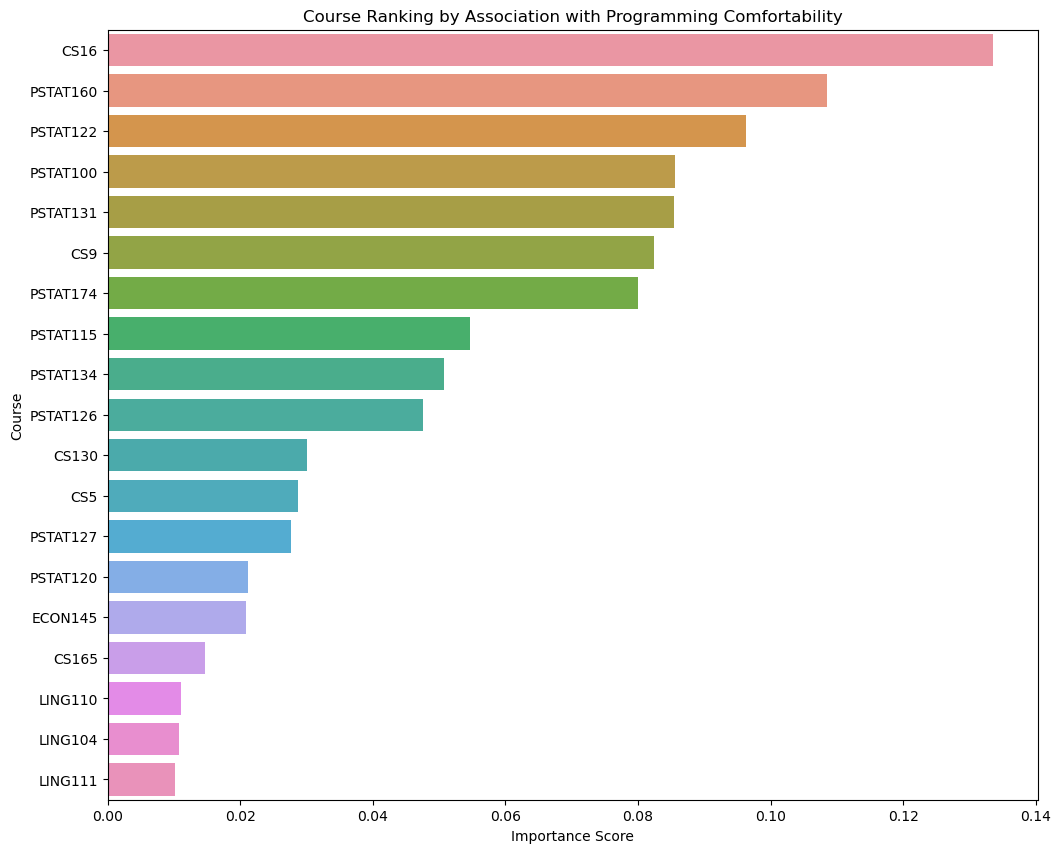

In [11]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Course', data=course_ranking)
plt.title('Course Ranking by Association with Programming Comfortability')
plt.xlabel('Importance Score')
plt.ylabel('Course')
plt.show()